In [1]:
# %load withholding.py
%matplotlib notebook
import matplotlib as plt
import numpy as np
import pandas as pd

df = pd.read_csv("../../data/withholding.tsv", sep="\t")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

def parse_array(s):
    try:
        return np.fromstring(s, dtype=float, sep="|")
    except:
        return np.array([float('nan')])

def expand(row):
    compute = parse_array(row.compute)
    rcompute = compute / np.sum(compute)
    activations = parse_array(row.activations)
    assert(np.sum(activations) == row.number_activations or row.error)
    ractivations = activations / row.number_activations
    reward = parse_array(row.reward)
    rreward = reward / np.sum(reward)
    d = {}
    d['attacker_compute'] = rcompute[0]
    d['attacker_relative_activations'] = ractivations[0]
    d['attacker_relative_reward'] = rreward[0]
    d['attacker_gain'] = rreward[0] - ractivations[0]
    d['attacker_efficiency'] = rreward[0] / ractivations[0]
    return d

df=df.join(df.apply(expand, axis=1, result_type='expand'))

In [2]:
d = df[df.protocol == "george"]
d = d[(d.incentive_scheme == 'constant') | (d.incentive_scheme == 'discount')]
d.columns

Index(['network', 'network_description', 'compute', 'protocol', 'k',
       'protocol_description', 'block_interval', 'activation_delay',
       'number_activations', 'activations', 'incentive_scheme',
       'incentive_scheme_description', 'strategy', 'strategy_description',
       'reward', 'machine_duration_s', 'error', 'attacker_compute',
       'attacker_relative_activations', 'attacker_relative_reward',
       'attacker_gain', 'attacker_efficiency'],
      dtype='object')

In [3]:
d.pivot(index=['attacker_compute', 'k'], columns=['strategy', 'incentive_scheme'], values='attacker_efficiency')

strategy             private-selfish-alt           private-selfish            \
incentive_scheme                constant  discount        constant  discount   
attacker_compute k                                                             
0.10             1              0.320687  0.320687        0.342593  0.342593   
                 2              0.212389  0.212389        0.223212  0.223212   
                 4              0.108914  0.104952        0.164421  0.160462   
                 8              0.134118  0.125876        0.137723  0.129833   
                 16             0.122138  0.113036        0.138381  0.127046   
                 32             0.167227  0.155647        0.182616  0.170832   
                 64             0.251555  0.233246        0.271227  0.254085   
                 128            0.363864  0.343441        0.387317  0.367299   
0.20             1              0.642317  0.642317        0.594916  0.594916   
                 2              0.516662  0.516662        0.518578  0.518578   
                 4              0.422675  0.404436        0.399140  0.376644   
                 8              0.397325  0.357042        0.362221  0.325072   
                 16             0.451980  0.402483        0.449638  0.397712   
                 32             0.612745  0.552138        0.708190  0.634090   
                 64             0.882862  0.839040        0.955088  0.915687   
                 128            1.097089  1.078401        1.091166  1.074488   
0.25             1              0.750998  0.750998        0.761114  0.761114   
                 2              0.662562  0.662562        0.643208  0.643208   
                 4              0.561385  0.535068        0.530320  0.503175   
                 8              0.547982  0.489931        0.543377  0.489966   
                 16             0.678076  0.599007        0.640520  0.563131   
                 32             0.970379  0.890468        0.857559  0.781551   
                 64             1.102365  1.065896        1.156081  1.127438   
                 128            1.231023  1.204949        1.252503  1.234191   
0.33             1              0.926275  0.926275        0.893635  0.893635   
                 2              0.855335  0.855335        0.843136  0.843136   
                 4              0.791665  0.759668        0.782222  0.752915   
                 8              0.841411  0.770370        0.878298  0.811264   
                 16             1.141637  1.056704        1.036420  0.949990   
                 32             1.284885  1.239196        1.298606  1.264377   
                 64             1.354320  1.333854        1.362509  1.345995   
                 128            1.430536  1.422783        1.438067  1.431383   
0.40             1              1.039574  1.039574        1.065147  1.065147   
                 2              1.008917  1.008917        1.016740  1.016740   
                 4              0.995911  0.976243        1.020441  0.998036   
                 8              1.120378  1.073154        1.101728  1.054024   
                 16             1.405766  1.391084        1.346506  1.310505   
                 32             1.589536  1.623119        1.541323  1.554631   
                 64             1.626691  1.647742        1.619929  1.639964   
                 128            1.627613  1.643627        1.634848  1.647277   
0.45             1              1.151628  1.151628        1.160859  1.160859   
                 2              1.099243  1.099243        1.104716  1.104716   
                 4              1.076261  1.058759        1.126423  1.111179   
                 8              1.283947  1.266620        1.276537  1.259719   
                 16             1.569830  1.609725        1.552751  1.582208   
                 32             1.669343  1.714759        1.680443  1.723510   
                 64             1.755055  1.775686        1.705462  1.744004   


<IPython.core.display.Javascript object>


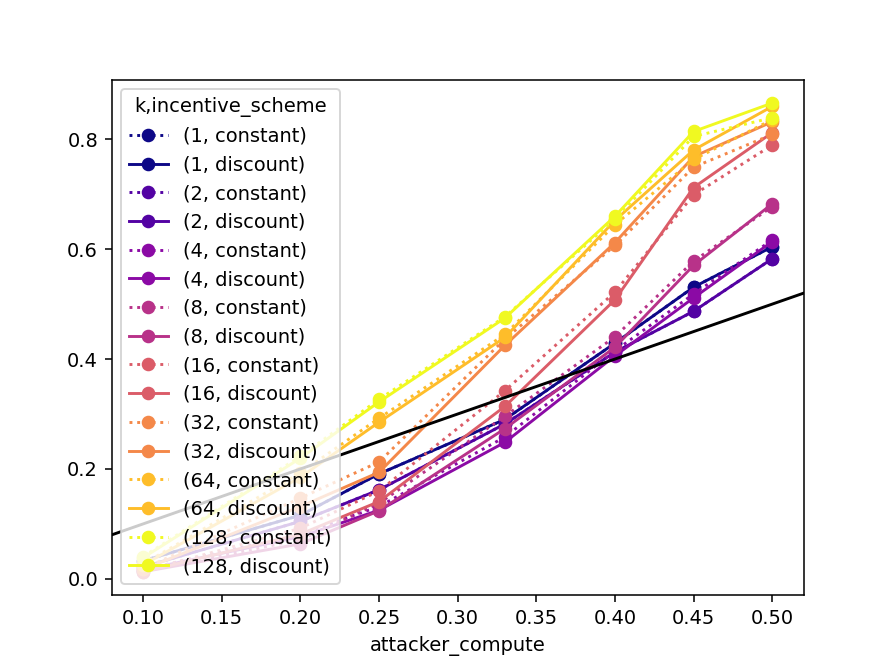

In [4]:
# compare same strategy for incentive schemes
dd = d[d.strategy == 'private-selfish']
dd = dd.pivot(index=['attacker_compute'], columns=['k', 'incentive_scheme'], values='attacker_relative_reward')
dd = dd[sorted(dd.columns)]
line_style = [ 'o-' if proto == 'discount' else 'o:' for (k, proto) in  dd.columns]
k = np.unique([ k for (k, proto) in dd.columns])
cmap = plt.cm.get_cmap('plasma', len(k))
colormap = { k: cmap(i) for (i, k) in enumerate(k) }
line_colors = [ colormap[k] for (k, proto) in dd.columns ]
line_colors
p = dd.plot(style=line_style, color=line_colors)
p.axline([.1, .1], [.5, .5], color='black')

<IPython.core.display.Javascript object>


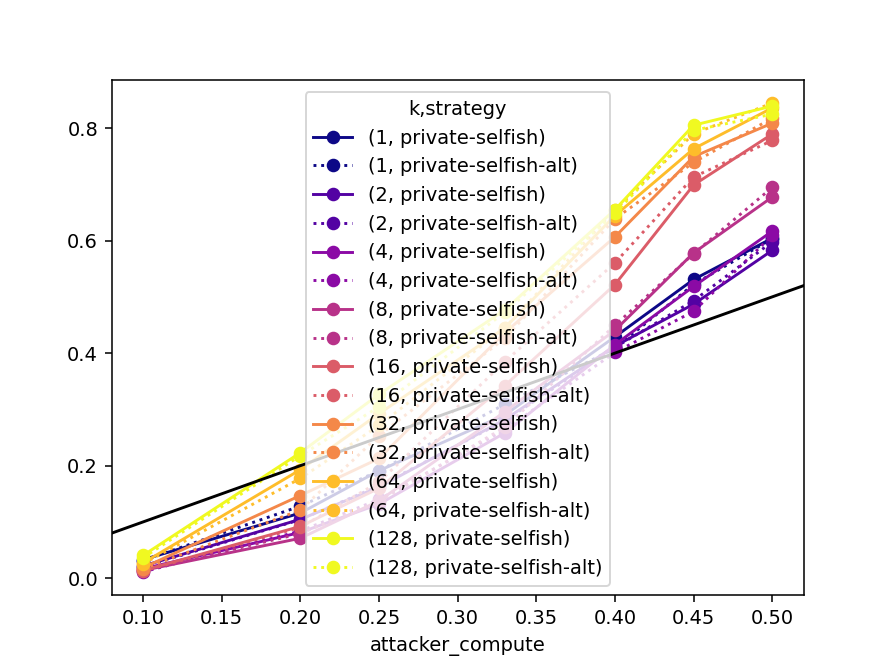

In [5]:
# does numerical implementation line up with non-numerical implementation of policiy?
dd = d
dd = dd[dd['protocol']=='george']
dd = dd[(dd['strategy']=='private-selfish') | (dd['strategy']=='private-selfish-alt')]
dd = dd[dd['incentive_scheme']=='constant']
dd = dd.pivot(index=['attacker_compute'], columns=['k', 'strategy'], values='attacker_relative_reward')
dd = dd[sorted(dd.columns)]
line_style = [ 'o-' if proto == 'private-selfish' else 'o:' for (k, proto) in  dd.columns]
k = np.unique([ k for (k, proto) in dd.columns])
cmap = plt.cm.get_cmap('plasma', len(k))
colormap = { k: cmap(i) for (i, k) in enumerate(k) }
line_colors = [ colormap[k] for (k, proto) in dd.columns ]
line_colors
p = dd.plot(style=line_style, color=line_colors)
p.axline([.1, .1], [.5, .5], color='black')
# it does not!